### 분류 예측의 불확실성 추정
* 어떤 테스트 포인트에 대해 분류기가 예측한 틀래스가 무엇인지 뿐만 아니라 정확한 클래스임을 얼마나 확신하는지가 중요할 때가 많다.

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named = np.array(['blue', 'red'])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(
    X, y_named, y, random_state=0
)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

* 결정 함수
    * 이진 분류에서 decision_function 반환값의 크기는 (n_samples,)이며 각 샘플이 하나의 실수 값을 반환한다.

In [10]:
print('X_test.shape:', X_test.shape)
print('decision function result shape:', gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
decision function result shape: (25,)


In [11]:
print('dicision function:\n{}'.format(gbrt.decision_function(X_test)[:6]))

dicision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [12]:
print('threshold, decision function:\n{}'.format(gbrt.decision_function(X_test) > 0))
print("predict: \n{}".format(gbrt.predict(X_test)))

threshold, decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
predict: 
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [13]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print('pred == gbrt.predict:', np.all(pred == gbrt.predict(X_test)))

pred == gbrt.predict: True


In [14]:
decision_function = gbrt.decision_function(X_test)
print('decision functiono min: {:.3f} max: {:.3f}'.format(
    np.min(decision_function), np.max(decision_function)))

decision functiono min: -7.691 max: 4.290


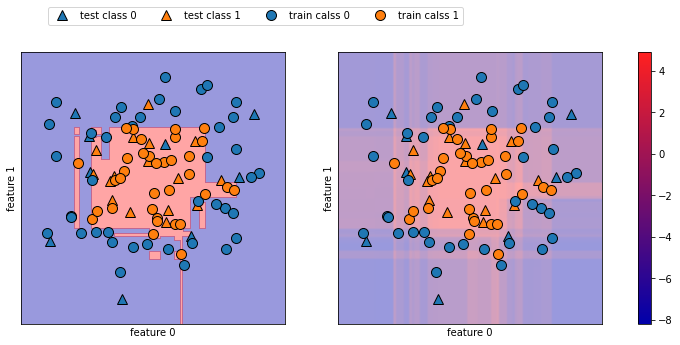

In [15]:
import mglearn
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['test class 0', 'test class 1', 'train calss 0', 'train calss 1'], ncol=4, loc=(.1, 1.1))

* 예측 확률
    * predict_proba의 출력은 각 클래스에 대한 확률.
    * 이진 분류에서는 항상 (n_samples, 2)

In [16]:
print('probability shape:', gbrt.predict_proba(X_test).shape)

probability shape: (25, 2)


In [17]:
print('predict probabilities:\n{}'.format(X_test[:6]))

predict probabilities:
[[ 0.13179551 -0.53591877]
 [-0.71786926  0.03192209]
 [-0.36118825 -1.4007017 ]
 [ 0.94124669 -0.01979147]
 [ 0.26516411 -0.03906867]
 [-0.4522767  -0.01130911]]


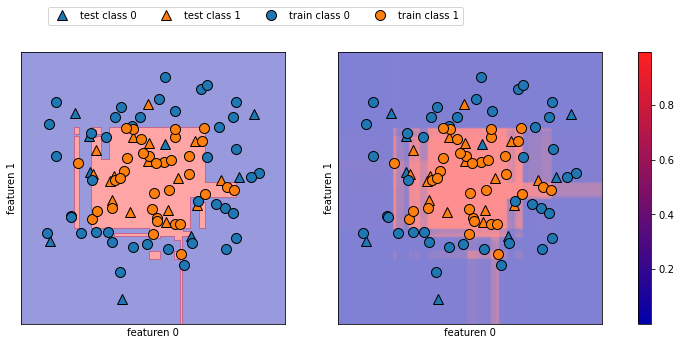

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('featuren 0')
    ax.set_ylabel('featuren 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['test class 0', 'test class 1', 'train class 0', 'train class 1'], ncol=4, loc=(.1, 1.1))

* 다중 분류에서의 불확실성

In [20]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42
)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [21]:
print('decision function shape:', gbrt.decision_function(X_test).shape)
print('decision function result:\n{}'.format(gbrt.decision_function(X_test)[:6, :]))

decision function shape: (38, 3)
decision function result:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [23]:
print('maximum decision function index:\n{}'.format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print('predict:\n{}'.format(gbrt.predict(X_test)))

maximum decision function index:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
predict:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [24]:
print('predict probabilities:\n{}'.format(gbrt.predict_proba(X_test)[:6]))
print('sum:', gbrt.predict_proba(X_test)[:6].sum(axis=1))

predict probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
sum: [1. 1. 1. 1. 1. 1.]


In [25]:
print('maximum prediction probability index:\n{}'.format(np.argmax(gbrt.predict_proba(X_test), axis=1)))
print('predict:\n{}'.format(gbrt.predict(X_test)))

maximum prediction probability index:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
predict:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print('train data calss:', logreg.classes_)
print('predict:', logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print('maximum decisin function index:', argmax_dec_func[:10])
print('index classes_:', logreg.classes_[argmax_dec_func][:10])

train data calss: ['setosa' 'versicolor' 'virginica']
predict: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
maximum decisin function index: [1 0 2 1 1 0 1 2 1 1]
index classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
